In [9]:
from scipy.stats import chisquare
from scipy.stats import kstest
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def lcm(seed, a, c, m, n):
    """ تابع تولید کننده اعداد شبه تصادفی با استفاده از الگوریتم LCM """
    numbers = []
    for _ in range(n):
        seed = (a * seed + c) % m
        numbers.append(seed / m)
    return numbers

# تولید 1000 عدد شبه تصادفی با LCM
lcm_numbers = lcm(seed=1, a=1103515245, c=12345, m=2**31, n=1000)

In [11]:
def clcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n):
    """ تابع تولید کننده اعداد شبه تصادفی با استفاده از الگوریتم CLCG """
    numbers1 = lcm(seed1, a1, c1, m1, n)
    numbers2 = lcm(seed2, a2, c2, m2, n)

    # ترکیب دو دنباله تولید شده
    combined_numbers = [(x + y) % 1.0 for x, y in zip(numbers1, numbers2)]
    return combined_numbers

# تولید 1000 عدد شبه تصادفی با CLCG
clcg_numbers = clcg(seed1=1, seed2=3, a1=1103515245, c1=12345, m1=2**31, a2=12345, c2=1103515245, m2=2**31, n=1000)

In [12]:
def xor_shift(seed, n):
    """ تابع تولید کننده اعداد شبه تصادفی با استفاده از الگوریتم xor-shift """
    numbers = []
    for _ in range(n):
        seed ^= (seed << 13) & 0xFFFFFFFF
        seed ^= (seed >> 17)
        seed ^= (seed << 5) & 0xFFFFFFFF
        numbers.append(seed / 0xFFFFFFFF)
    return numbers

# تولید 1000 عدد شبه تصادفی با xor-shift
xor_shift_numbers = xor_shift(seed=123456789, n=1000)

In [13]:
def ks_test(data, cdf='uniform', level_of_significance=0.05):
    """ تابع انجام تست KS """
    statistic, p_value = kstest(data, cdf)
    result = 'Reject' if p_value < level_of_significance else 'Accept'
    print(f"KS-test Statistic: {statistic}, P-value: {p_value}, Result: {result}")

# مثال استفاده از تابع KS-test
ks_test(clcg_numbers, 'uniform', 0.05)

KS-test Statistic: 0.017669187530875208, P-value: 0.9081762654084548, Result: Accept


In [14]:
def chi_square_test(data, bins, level_of_significance=0.05):
    """ تابع انجام تست chi-square """
    hist, _ = np.histogram(data, bins=bins)
    stat, p_value = chisquare(hist)
    result = 'Reject' if p_value < level_of_significance else 'Accept'
    print(f"Chi-Square Statistic: {stat}, P-value: {p_value}, Result: {result}")

# مثال استفاده از تابع chi-square test
chi_square_test(clcg_numbers, bins=10, level_of_significance=0.05)

Chi-Square Statistic: 6.72, P-value: 0.6662452004241639, Result: Accept


In [15]:
def auto_correlation_test(data, lag, level_of_significance=0.05):
    """ تابع انجام تست auto-correlation """
    n = len(data)
    mean = sum(data) / n
    auto_corr = sum((data[i] - mean) * (data[i + lag] - mean) for i in range(n - lag)) / sum((data[i] - mean)**2 for i in range(n))
    result = 'Significant' if abs(auto_corr) > level_of_significance else 'Not Significant'
    print(f"Auto-correlation: {auto_corr}, Result: {result}")

# مثال استفاده از تابع auto-correlation test
auto_correlation_test(clcg_numbers, lag=5, level_of_significance=0.05)

Auto-correlation: -0.019346665776025528, Result: Not Significant


In [16]:
def chi_square_test(data, bins):
    """ تابع انجام تست chi-square بر روی داده‌های ورودی """
    hist, _ = np.histogram(data, bins=bins)
    stat, p_value = chisquare(hist)
    return stat, p_value

In [17]:
# تست chi-square برای اعداد تولید شده با CLCG
stat, p_value = chi_square_test(clcg_numbers, bins=10)
print(f"Chi-Square Statistic (CLCG): {stat}, P-value: {p_value}")

# تست chi-square برای اعداد تولید شده با xor-shift
stat, p_value = chi_square_test(xor_shift_numbers, bins=10)
print(f"Chi-Square Statistic (xor-shift): {stat}, P-value: {p_value}")

Chi-Square Statistic (CLCG): 6.72, P-value: 0.6662452004241639
Chi-Square Statistic (xor-shift): 7.159999999999999, P-value: 0.620465261681055


In [18]:
def auto_correlation_test(data, lag, significance_level):
    """ تابع انجام تست auto-correlation بر روی داده‌های ورودی """
    n = len(data)
    mean = sum(data) / n
    auto_corr = sum((data[i] - mean) * (data[i + lag] - mean) for i in range(n - lag)) / sum((data[i] - mean)**2 for i in range(n))
    return auto_corr

In [19]:
# تست auto-correlation برای اعداد تولید شده با CLCG
auto_corr_clcg = auto_correlation_test(clcg_numbers, lag=5, significance_level=0.05)
print(f"Auto-correlation (CLCG): {auto_corr_clcg}")

# تست auto-correlation برای اعداد تولید شده با LCM
auto_corr_lcm = auto_correlation_test(lcm_numbers, lag=5, significance_level=0.05)
print(f"Auto-correlation (LCM): {auto_corr_lcm}")

# تست auto-correlation برای اعداد تولید شده با xor-shift
auto_corr_xor_shift = auto_correlation_test(xor_shift_numbers, lag=5, significance_level=0.05)
print(f"Auto-correlation (xor-shift): {auto_corr_xor_shift}")

Auto-correlation (CLCG): -0.019346665776025528
Auto-correlation (LCM): -0.013811066035246159
Auto-correlation (xor-shift): 0.03380556496407747


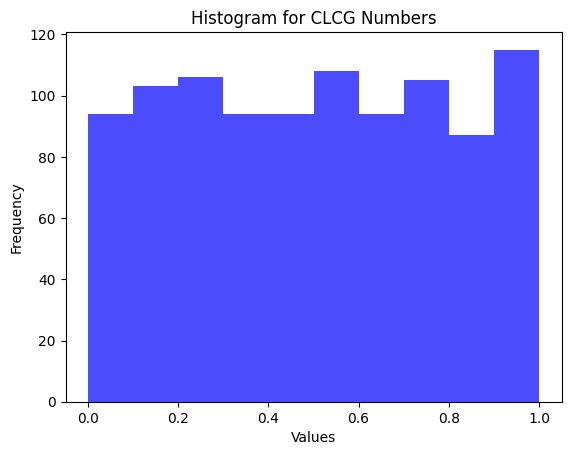

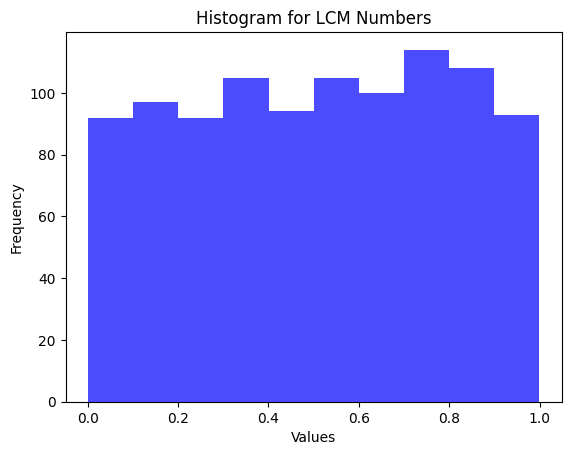

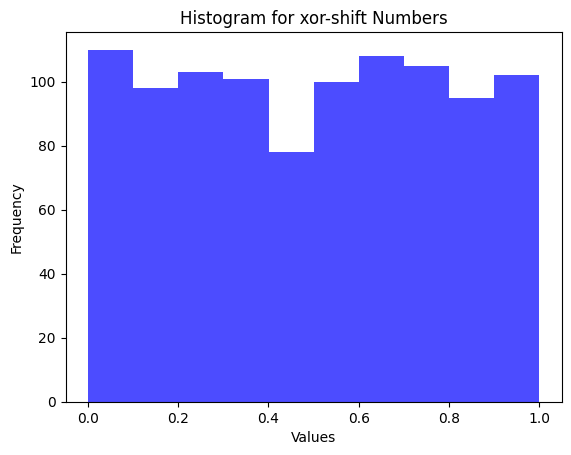

In [20]:
def plot_histogram(data, title):
    """ تابع رسم هیستوگرام برای داده‌های ورودی """
    plt.hist(data, bins=10, alpha=0.7, color='blue')
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

# رسم هیستوگرام برای اعداد تولید شده با CLCG
plot_histogram(clcg_numbers, 'Histogram for CLCG Numbers')

# رسم هیستوگرام برای اعداد تولید شده با LCM
plot_histogram(lcm_numbers, 'Histogram for LCM Numbers')

# رسم هیستوگرام برای اعداد تولید شده با xor-shift
plot_histogram(xor_shift_numbers, 'Histogram for xor-shift Numbers')